In [40]:

import os
os.chdir('/Users/ptm/desktop/Current_working_directory/DIPY/')
import matplotlib.pyplot as plt
%matplotlib inline


"""
=========================
Getting started with DIPY
=========================

In diffusion MRI (dMRI) usually we use three types of files, a Nifti file with the
diffusion weighted data, and two text files one with b-values and
one with the b-vectors.

In dipy_ we provide tools to load and process these files and we also provide
access to publically available datasets for those who haven't acquired yet
their own datasets.

With the following commands we can download a dMRI dataset
"""

from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

"""
By default these datasets will go in the ``.dipy`` folder inside your home directory.
Here is how you can access them.
"""

from os.path import expanduser, join
home = expanduser('~')

"""
``dname`` holds the directory name where the 3 files are in.
"""

dname = join(home, '.dipy', 'sherbrooke_3shell')

"""
Here, we show the complete filenames of the 3 files
"""

fdwi = join(dname, 'HARDI193.nii.gz')

print(fdwi)

fbval = join(dname, 'HARDI193.bval')

print(fbval)

fbvec = join(dname, 'HARDI193.bvec')

print(fbvec)


Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/sherbrooke_3shell 
/Users/ptm/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/Users/ptm/.dipy/sherbrooke_3shell/HARDI193.bval
/Users/ptm/.dipy/sherbrooke_3shell/HARDI193.bvec


In [41]:

"""
``/home/username/.dipy/sherbrooke_3shell/HARDI193.nii.gz``

``/home/username/.dipy/sherbrooke_3shell/HARDI193.bval``

``/home/username/.dipy/sherbrooke_3shell/HARDI193.bvec``

Now, that we have their filenames we can start checking what these look like.

Let's start first by loading the dMRI datasets. For this purpose, we
use a python library called nibabel_ which enables us to read and write
neuroimaging-specific file formats.
"""

import nibabel as nib
img = nib.load(fdwi)
data = img.get_data()

"""
``data`` is a 4D array where the first 3 dimensions are the i, j, k voxel
coordinates and the last dimension is the number of non-weighted (S0s) and
diffusion-weighted volumes.

We can very easily check the size of ``data`` in the following way:
"""

print(data.shape)

"""
``(128, 128, 60, 194)``

We can also check the dimensions of each voxel in the following way:
"""

print(img.header.get_zooms()[:3])

"""
``(2.0, 2.0, 2.0)``

We can quickly visualize the results using matplotlib_. For example,
let's show here the middle axial slices of volume 0 and volume 10.
"""


(128, 128, 60, 193)
(2.0, 2.0, 2.0)


"\n``(2.0, 2.0, 2.0)``\n\nWe can quickly visualize the results using matplotlib_. For example,\nlet's show here the middle axial slices of volume 0 and volume 10.\n"

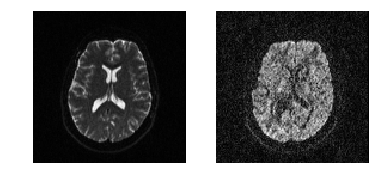

In [42]:

import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('data.png', bbox_inches='tight')



In [43]:


"""
.. figure:: data.png
   :align: center

   Showing the middle axial slice without (left) and with (right) diffusion weighting.

The next step is to load the b-values and b-vectors from the disk using
the function ``read_bvals_bvecs``.
"""

from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

"""
In DIPY, we use an object called ``GradientTable`` which holds all the
acquisition specific parameters, e.g. b-values, b-vectors, timings and others.
To create this object you can use the function ``gradient_table``.
"""

from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

"""
Finally, you can use ``gtab`` (the GradientTable object) to show some information about the
acquisition parameters
"""

print(gtab.info)


B-values shape (193,)
         min 0.000000 
         max 3500.000000 
B-vectors shape (193, 3)
         min -0.964050 
         max 0.999992 
None


In [44]:

"""
B-values shape (193,)
         min 0.000000
         max 3500.000000
B-vectors shape (193, 3)
         min -0.964050
         max 0.999992

You, can also see the b-values using:
"""

print(gtab.bvals)


[    0.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  3500.
  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
  3500

In [45]:

"""

::

    [    0.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
      1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
      1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
      1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
      1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
      1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
      1000.  1000.  1000.  1000.  1000.  2000.  2000.  2000.  2000.  2000.
      2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
      2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
      2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
      2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
      2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
      2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  3500.
      3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
      3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
      3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
      3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
      3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
      3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
      3500.  3500.  3500.]

Or, for example the 10 first b-vectors using:
"""

print(gtab.bvecs[:10, :])


[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [46]:

"""

::

    array([[ 0.        ,  0.        ,  0.        ],
           [ 0.999979  , -0.00504001, -0.00402795],
           [ 0.        ,  0.999992  , -0.00398794],
           [-0.0257055 ,  0.653861  , -0.756178  ],
           [ 0.589518  , -0.769236  , -0.246462  ],
           [-0.235785  , -0.529095  , -0.815147  ],
           [-0.893578  , -0.263559  , -0.363394  ],
           [ 0.79784   ,  0.133726  , -0.587851  ],
           [ 0.232937  ,  0.931884  , -0.278087  ],
           [ 0.93672   ,  0.144139  , -0.31903   ]])

``gtab``  can be used to tell what part of the data is the S0 volumes
(volumes which correspond to b-values of 0).
"""

S0s = data[:, :, :, gtab.b0s_mask]

"""
Here, we had only 1 S0 as we can verify by looking at the dimensions of S0s
"""

print(S0s.shape)


(128, 128, 60, 1)


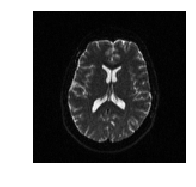

'\nNow, that we learned how to load dMRI datasets we can start the analysis.\nSee example :ref:`example_reconst_dti` to learn how to create FA maps.\n\n.. include:: ../links_names.inc\n\n'

In [47]:

"""
``(128, 128, 60, 1)``

Just, for fun let's save this in a new Nifti file.
"""

nib.save(nib.Nifti1Image(S0s, img.affine), 'HARDI193_S0.nii.gz')

##
##
##
import nibabel as nib
#newImage = join(dname, 'HARDI193_S0.nii.gz')
newImage = '/Users/ptm/desktop/Current_working_directory/DIPY/HARDI193_S0.nii.gz'
img = nib.load(newImage)
data = img.get_data()
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
#plt.subplot(1, 2, 2).set_axis_off()
#plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('HARDI193_S0.png', bbox_inches='tight')
##
##
##




"""
Now, that we learned how to load dMRI datasets we can start the analysis.
See example :ref:`example_reconst_dti` to learn how to create FA maps.

.. include:: ../links_names.inc

"""


In [48]:

#https://dipy.herokuapp.com/documentation/0.12.0.dev/examples_built/reconst_dti/#example-reconst-dti

"""

.. _reconst_dti:

============================================================
Reconstruction of the diffusion signal with the Tensor model
============================================================

The diffusion tensor model is a model that describes the diffusion within a
voxel. First proposed by Basser and colleagues [Basser1994]_, it has been very
influential in demonstrating the utility of diffusion MRI in characterizing the
micro-structure of white matter tissue and of the biophysical properties of
tissue, inferred from local diffusion properties and it is still very commonly
used.

The diffusion tensor models the diffusion signal as:

.. math::

    \frac{S(\mathbf{g}, b)}{S_0} = e^{-b\mathbf{g}^T \mathbf{D} \mathbf{g}}

Where $\mathbf{g}$ is a unit vector in 3 space indicating the direction of
measurement and b are the parameters of measurement, such as the strength and
duration of diffusion-weighting gradient. $S(\mathbf{g}, b)$ is the
diffusion-weighted signal measured and $S_0$ is the signal conducted in a
measurement with no diffusion weighting. $\mathbf{D}$ is a positive-definite quadratic
form, which contains six free parameters to be fit. These six parameters are:

.. math::

   \mathbf{D} = \begin{pmatrix} D_{xx} & D_{xy} & D_{xz} \\
                       D_{yx} & D_{yy} & D_{yz} \\
                       D_{zx} & D_{zy} & D_{zz} \\ \end{pmatrix}

This matrix is a variance/covariance matrix of the diffusivity along the three
spatial dimensions. Note that we can assume that diffusivity has antipodal
symmetry, so elements across the diagonal are equal. For example:
$D_{xy} = D_{yx}$. This is why there are only 6 free parameters to estimate
here.

In the following example we show how to reconstruct your diffusion datasets
using a single tensor model.

First import the necessary modules:

``numpy`` is for numerical computation

"""

import numpy as np

"""
``nibabel`` is for loading imaging datasets
"""

import nibabel as nib

"""
``dipy.reconst`` is for the reconstruction algorithms which we use to create
voxel models from the raw data.
"""

import dipy.reconst.dti as dti

"""
``dipy.data`` is used for small datasets that we use in tests and examples.
"""

from dipy.data import fetch_stanford_hardi

"""
Fetch will download the raw dMRI dataset of a single subject. The size of the
dataset is 87 MBytes. You only need to fetch once.
"""

fetch_stanford_hardi()

"""
Next, we read the saved dataset
"""

from dipy.data import read_stanford_hardi

img, gtab = read_stanford_hardi()

"""
``img`` contains a nibabel Nifti1Image object (with the data) and gtab contains a
``GradientTable`` object (information about the gradients e.g. b-values and
b-vectors).
"""

data = img.get_data()
print('data.shape (%d, %d, %d, %d)' % data.shape)


Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/stanford_hardi 
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/stanford_hardi 
data.shape (81, 106, 76, 160)


In [49]:

"""
data.shape ``(81, 106, 76, 160)``

First of all, we mask and crop the data. This is a quick way to avoid
calculating Tensors on the background of the image. This is done using dipy_'s
``mask`` module.
"""

from dipy.segment.mask import median_otsu

maskdata, mask = median_otsu(data, 3, 1, True,
                             vol_idx=range(10, 50), dilate=2)
print('maskdata.shape (%d, %d, %d, %d)' % maskdata.shape)


maskdata.shape (71, 87, 62, 160)


Computing anisotropy measures (FA, MD, RGB)


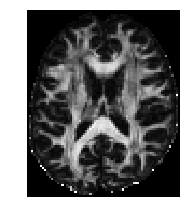

In [50]:

"""
maskdata.shape ``(72, 87, 59, 160)``

Now that we have prepared the datasets we can go forward with the voxel
reconstruction. First, we instantiate the Tensor model in the following way.
"""

tenmodel = dti.TensorModel(gtab)

"""
Fitting the data is very simple. We just need to call the fit method of the
TensorModel in the following way:
"""

tenfit = tenmodel.fit(maskdata)

"""
The fit method creates a ``TensorFit`` object which contains the fitting parameters
and other attributes of the model. For example we can generate fractional
anisotropy (FA) from the eigen-values of the tensor. FA is used to characterize
the degree to which the distribution of diffusion in a voxel is
directional. That is, whether there is relatively unrestricted diffusion in one
particular direction.

Mathematically, FA is defined as the normalized variance of the eigen-values of
the tensor:

.. math::

        FA = \sqrt{\frac{1}{2}\frac{(\lambda_1-\lambda_2)^2+(\lambda_1-
                    \lambda_3)^2+(\lambda_2-\lambda_3)^2}{\lambda_1^2+
                    \lambda_2^2+\lambda_3^2}}

Note that FA should be interpreted carefully. It may be an indication of the
density of packing of fibers in a voxel, and the amount of myelin wrapping these
axons, but it is not always a measure of "tissue integrity". For example, FA
may decrease in locations in which there is fanning of white matter fibers, or
where more than one population of white matter fibers crosses.
"""

print('Computing anisotropy measures (FA, MD, RGB)')
from dipy.reconst.dti import fractional_anisotropy, color_fa, lower_triangular

FA = fractional_anisotropy(tenfit.evals)

"""
In the background of the image the fitting will not be accurate there is no
signal and possibly we will find FA values with nans (not a number). We can
easily remove these in the following way.
"""

FA[np.isnan(FA)] = 0

"""
Saving the FA images is very easy using nibabel_. We need the FA volume and the
affine matrix which transform the image's coordinates to the world coordinates.
Here, we choose to save the FA in ``float32``.
"""

fa_img = nib.Nifti1Image(FA.astype(np.float32), img.affine)
nib.save(fa_img, 'tensor_fa.nii.gz')


##
##
##
import nibabel as nib
#newImage = join(dname, 'HARDI193_S0.nii.gz')
newImage = '/Users/ptm/desktop/Current_working_directory/DIPY/tensor_fa.nii.gz'
img = nib.load(newImage)
data = img.get_data()
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle].T, cmap='gray', origin='lower')
#plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
#plt.subplot(1, 2, 2).set_axis_off()
#plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('tensor_fa.png', bbox_inches='tight')
##
##
##



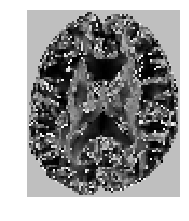

In [51]:


"""
You can now see the result with any nifti viewer or check it slice by slice
using matplotlib_'s ``imshow``. In the same way you can save the eigen values, the
eigen vectors or any other properties of the tensor.
"""

evecs_img = nib.Nifti1Image(tenfit.evecs.astype(np.float32), img.affine)
nib.save(evecs_img, 'tensor_evecs.nii.gz')

##
##
##
import nibabel as nib
#newImage = join(dname, 'HARDI193_S0.nii.gz')
newImage = '/Users/ptm/desktop/Current_working_directory/DIPY/tensor_evecs.nii.gz'
img = nib.load(newImage)
data = img.get_data()
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0, 0].T, cmap='gray', origin='lower')
#plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
#plt.subplot(1, 2, 2).set_axis_off()
#plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('tensor_fa.png', bbox_inches='tight')
##
##
##



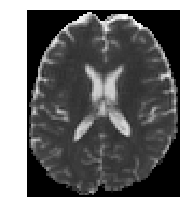

In [52]:


"""
Other tensor statistics can be calculated from the ``tenfit`` object. For example,
a commonly calculated statistic is the mean diffusivity (MD). This is simply the
mean of the  eigenvalues of the tensor. Since FA is a normalized
measure of variance and MD is the mean, they are often used as complimentary
measures. In DIPY, there are two equivalent ways to calculate the mean
diffusivity. One is by calling the ``mean_diffusivity`` module function on the
eigen-values of the ``TensorFit`` class instance:
"""

MD1 = dti.mean_diffusivity(tenfit.evals)
nib.save(nib.Nifti1Image(MD1.astype(np.float32), img.affine), 'tensors_md.nii.gz')

##
##
##
import nibabel as nib
#newImage = join(dname, 'HARDI193_S0.nii.gz')
newImage = '/Users/ptm/desktop/Current_working_directory/DIPY/tensors_md.nii.gz'
img = nib.load(newImage)
data = img.get_data()
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle].T, cmap='gray', origin='lower')
#plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
#plt.subplot(1, 2, 2).set_axis_off()
#plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('tensor_fa.png', bbox_inches='tight')
##
##
##


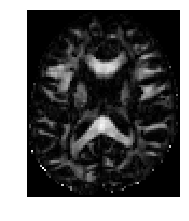

In [53]:

"""
The other is to call the ``TensorFit`` class method:
"""

MD2 = tenfit.md

"""
Obviously, the quantities are identical.

We can also compute the colored FA or RGB-map [Pajevic1999]_. First, we make sure
that the FA is scaled between 0 and 1, we compute the RGB map and save it.
"""

FA = np.clip(FA, 0, 1)
RGB = color_fa(FA, tenfit.evecs)
nib.save(nib.Nifti1Image(np.array(255 * RGB, 'uint8'), img.affine), 'tensor_rgb.nii.gz')

##
##
##
import nibabel as nib
#newImage = join(dname, 'HARDI193_S0.nii.gz')
newImage = '/Users/ptm/desktop/Current_working_directory/DIPY/tensor_rgb.nii.gz'
img = nib.load(newImage)
data = img.get_data()
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
#plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
#plt.subplot(1, 2, 2).set_axis_off()
#plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('tensor_fa.png', bbox_inches='tight')
##
##
##


Computing tensor ellipsoids in a part of the splenium of the CC
Saving illustration as tensor_ellipsoids.png


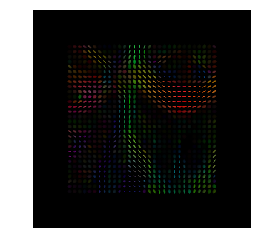

In [54]:

"""
Let's try to visualize the tensor ellipsoids of a small rectangular
area in an axial slice of the splenium of the corpus callosum (CC).
"""

print('Computing tensor ellipsoids in a part of the splenium of the CC')

from dipy.data import get_sphere
sphere = get_sphere('symmetric724')

from dipy.viz import fvtk
ren = fvtk.ren()

evals = tenfit.evals[13:43, 44:74, 28:29]
evecs = tenfit.evecs[13:43, 44:74, 28:29]

"""
We can color the ellipsoids using the ``color_fa`` values that we calculated
above. In this example we additionally normalize the values to increase the
contrast.
"""

cfa = RGB[13:43, 44:74, 28:29]
cfa /= cfa.max()

fvtk.add(ren, fvtk.tensor(evals, evecs, cfa, sphere))

print('Saving illustration as tensor_ellipsoids.png')
fvtk.record(ren, n_frames=1, out_path='/Users/ptm/desktop/Current_working_directory/DIPY/tensor_ellipsoids.png', size=(600, 600))

##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/tensor_ellipsoids.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
##
##
##


Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/stanford_hardi 
Saving illustration as tensor_odfs.png


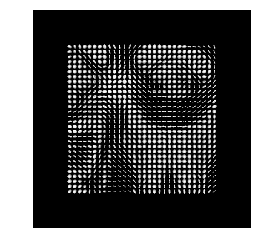

In [55]:

"""
.. figure:: tensor_ellipsoids.png
   :align: center

   Tensor Ellipsoids.
"""

fvtk.clear(ren)

"""
Finally, we can visualize the tensor Orientation Distribution Functions
for the same area as we did with the ellipsoids.
"""

##
##
##
import nibabel as nib
img, gtab = read_stanford_hardi()
data = img.get_data()
##
##
##


tensor_odfs = tenmodel.fit(data[20:50, 55:85, 38:39]).odf(sphere)

fvtk.add(ren, fvtk.sphere_funcs(tensor_odfs, sphere, colormap=None))
#fvtk.show(r)
print('Saving illustration as tensor_odfs.png')
fvtk.record(ren, n_frames=1, out_path='/Users/ptm/desktop/Current_working_directory/DIPY/tensor_odfs.png', size=(600, 600))



##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/tensor_odfs.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
##
##
##


In [56]:


"""
.. figure:: tensor_odfs.png
   :align: center

   Tensor ODFs.

Note that while the tensor model is an accurate and reliable model of the
diffusion signal in the white matter, it has the drawback that it only has one
principal diffusion direction. Therefore, in locations in the brain that
contain multiple fiber populations crossing each other, the tensor model may
indicate that the principal diffusion direction is intermediate to these
directions. Therefore, using the principal diffusion direction for tracking in
these locations may be misleading and may lead to errors in defining the
tracks. Fortunately, other reconstruction methods can be used to represent the
diffusion and fiber orientations in those locations. These are presented in
other examples.

References
----------

.. [Basser1994] Basser PJ, Mattielo J, LeBihan (1994). MR diffusion tensor
   spectroscopy and imaging.

.. [Pajevic1999] Pajevic S, Pierpaoli (1999). Color schemes to represent the
   orientation of anisotropic tissues from diffusion tensor data: application
   to white matter fiber tract mapping in the human brain.

.. include:: ../links_names.inc

"""


#https://dipy.herokuapp.com/documentation/0.12.0.dev/examples_built/tracking_quick_start/#example-tracking-quick-start


'\n.. figure:: tensor_odfs.png\n   :align: center\n\n   Tensor ODFs.\n\nNote that while the tensor model is an accurate and reliable model of the\ndiffusion signal in the white matter, it has the drawback that it only has one\nprincipal diffusion direction. Therefore, in locations in the brain that\ncontain multiple fiber populations crossing each other, the tensor model may\nindicate that the principal diffusion direction is intermediate to these\ndirections. Therefore, using the principal diffusion direction for tracking in\nthese locations may be misleading and may lead to errors in defining the\ntracks. Fortunately, other reconstruction methods can be used to represent the\ndiffusion and fiber orientations in those locations. These are presented in\nother examples.\n\nReferences\n----------\n\n.. [Basser1994] Basser PJ, Mattielo J, LeBihan (1994). MR diffusion tensor\n   spectroscopy and imaging.\n\n.. [Pajevic1999] Pajevic S, Pierpaoli (1999). Color schemes to represent the\n   or

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/stanford_hardi 
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/stanford_hardi 
Data size is approximately 12MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/syn_test 
Data size is approximately 12MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/ptm/.dipy/syn_test 


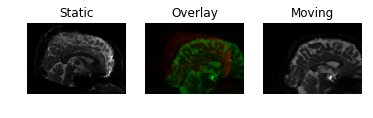

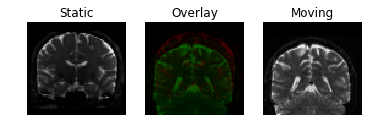

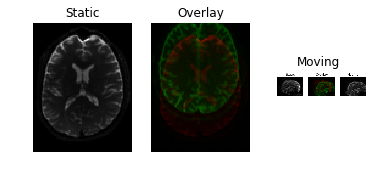

In [57]:

# https://dipy.herokuapp.com/documentation/0.12.0.dev/examples_built/affine_registration_3d/#example-affine-registration-3d

"""
==========================================
Affine Registration in 3D
==========================================
This example explains how to compute an affine transformation to register two
3D volumes by maximization of their Mutual Information [Mattes03]_. The
optimization strategy is similar to that implemented in ANTS [Avants11]_.
"""

import numpy as np
from dipy.viz import regtools
from dipy.data import fetch_stanford_hardi, read_stanford_hardi
from dipy.data.fetcher import fetch_syn_data, read_syn_data
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)

"""
Let's fetch two b0 volumes, the static image will be the b0 from the Stanford
HARDI dataset
"""

fetch_stanford_hardi()
nib_stanford, gtab_stanford = read_stanford_hardi()
static = np.squeeze(nib_stanford.get_data())[..., 0]
static_grid2world = nib_stanford.affine

"""
Now the moving image
"""

fetch_syn_data()
nib_syn_t1, nib_syn_b0 = read_syn_data()
moving = np.array(nib_syn_b0.get_data())
moving_grid2world = nib_syn_b0.affine

"""
We can see that the images are far from aligned by drawing one on top of
the other. The images don't even have the same number of voxels, so in order
to draw one on top of the other we need to resample the moving image on a grid
of the same dimensions as the static image, we can do this by "transforming"
the moving image using an identity transform
"""

identity = np.eye(4)
affine_map = AffineMap(identity,
                       static.shape, static_grid2world,
                       moving.shape, moving_grid2world)
resampled = affine_map.transform(moving)
regtools.overlay_slices(static, resampled, None, 0,
                        "Static", "Moving", "resampled_0.png")
regtools.overlay_slices(static, resampled, None, 1,
                        "Static", "Moving", "resampled_1.png")
regtools.overlay_slices(static, resampled, None, 2,
                        "Static", "Moving", "resampled_2.png")


##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/resampled_0.png" #Image to be used as query
image_nameTwo = "/Users/ptm/desktop/Current_working_directory/DIPY/resampled_1.png"
image_nameThree = "/Users/ptm/desktop/Current_working_directory/DIPY/resampled_2.png"

def plotImage(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
plotImage(image_nameTwo)
plotImage(image_nameThree)
plt.show()
plt.clf()
##
##
##



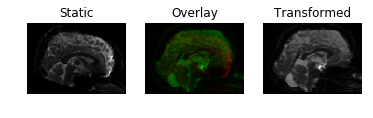

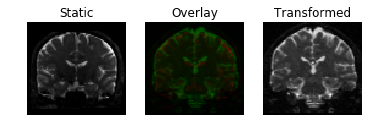

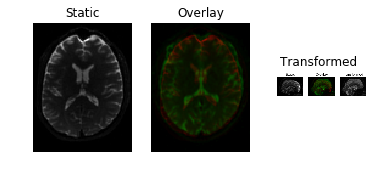

In [58]:


"""
.. figure:: resampled_0.png
   :align: center
.. figure:: resampled_1.png
   :align: center
.. figure:: resampled_2.png
   :align: center

   Input images before alignment.
"""

"""
We can obtain a very rough (and fast) registration by just aligning the centers
of mass of the two images
"""

c_of_mass = transform_centers_of_mass(static, static_grid2world,
                                      moving, moving_grid2world)

"""
We can now transform the moving image and draw it on top of the static image,
registration is not likely to be good, but at least they will occupy roughly
the same space
"""

transformed = c_of_mass.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_com_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_com_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_com_2.png")


##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_com_0.png" #Image to be used as query
image_nameTwo = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_com_1.png"
image_nameThree = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_com_2.png"

def plotImage(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
plotImage(image_nameTwo)
plotImage(image_nameThree)
plt.show()
plt.clf()
##
##
##


Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


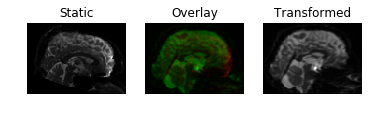

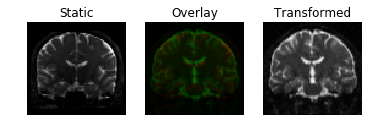

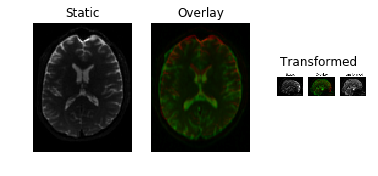

In [59]:

"""
.. figure:: transformed_com_0.png
   :align: center
.. figure:: transformed_com_1.png
   :align: center
.. figure:: transformed_com_2.png
   :align: center

   Registration result by aligning the centers of mass of the images.
"""

"""
This was just a translation of the moving image towards the static image, now
we will refine it by looking for an affine transform. We first create the
similarity metric (Mutual Information) to be used. We need to specify the
number of bins to be used to discretize the joint and marginal probability
distribution functions (PDF), a typical value is 32. We also need to specify
the percentage (an integer in (0, 100]) of voxels to be used for computing the
PDFs, the most accurate registration will be obtained by using all voxels, but
it is also the most time-consuming choice. We specify full sampling by passing
None instead of an integer
"""

nbins = 32
sampling_prop = None
metric = MutualInformationMetric(nbins, sampling_prop)

"""
To avoid getting stuck at local optima, and to accelerate convergence, we use a
multi-resolution strategy (similar to ANTS [Avants11]_) by building a Gaussian
Pyramid. To have as much flexibility as possible, the user can specify how this
Gaussian Pyramid is built. First of all, we need to specify how many
resolutions we want to use. This is indirectly specified by just providing a
list of the number of iterations we want to perform at each resolution. Here we
will just specify 3 resolutions and a large number of iterations, 10000 at the
coarsest resolution, 1000 at the medium resolution and 100 at the finest. These
are the default settings
"""

level_iters = [10000, 1000, 100]

"""
To compute the Gaussian pyramid, the original image is first smoothed at each
level of the pyramid using a Gaussian kernel with the requested sigma. A good
initial choice is [3.0, 1.0, 0.0], this is the default
"""

sigmas = [3.0, 1.0, 0.0]

"""
Now we specify the sub-sampling factors. A good configuration is [4, 2, 1],
which means that, if the original image shape was (nx, ny, nz) voxels, then the
shape of the coarsest image will be about (nx//4, ny//4, nz//4), the shape in
the middle resolution will be about (nx//2, ny//2, nz//2) and the image at the
finest scale has the same size as the original image. This set of factors is
the default
"""

factors = [4, 2, 1]

"""
Now we go ahead and instantiate the registration class with the configuration
we just prepared
"""

affreg = AffineRegistration(metric=metric,
                            level_iters=level_iters,
                            sigmas=sigmas,
                            factors=factors)

"""
Using AffineRegistration we can register our images in as many stages as we
want, providing previous results as initialization for the next (the same logic
as in ANTS). The reason why it is useful is that registration is a non-convex
optimization problem (it may have more than one local optima), which means that
it is very important to initialize as close to the solution as possible. For
example, lets start with our (previously computed) rough transformation
aligning the centers of mass of our images, and then refine it in three stages.
First look for an optimal translation. The dictionary regtransforms contains
all available transforms, we obtain one of them by providing its name and the
dimension (either 2 or 3) of the image we are working with (since we are
aligning volumes, the dimension is 3)
"""

transform = TranslationTransform3D()
params0 = None
starting_affine = c_of_mass.affine
translation = affreg.optimize(static, moving, transform, params0,
                              static_grid2world, moving_grid2world,
                              starting_affine=starting_affine)

"""
If we look at the result, we can see that this translation is much better than
simply aligning the centers of mass
"""

transformed = translation.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_trans_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_trans_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_trans_2.png")

##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_trans_0.png" #Image to be used as query
image_nameTwo = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_trans_1.png"
image_nameThree = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_trans_2.png"

def plotImage(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
plotImage(image_nameTwo)
plotImage(image_nameThree)
plt.show()
plt.clf()
##
##
##


Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


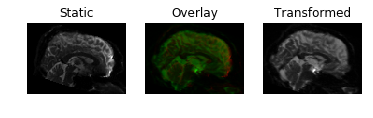

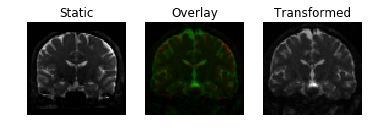

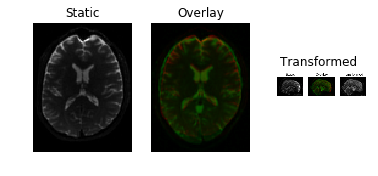

In [60]:

"""
.. figure:: transformed_trans_0.png
   :align: center
.. figure:: transformed_trans_1.png
   :align: center
.. figure:: transformed_trans_2.png
   :align: center

   Registration result by translating the moving image, using Mutual Information.
"""

"""
Now lets refine with a rigid transform (this may even modify our previously
found optimal translation)
"""

transform = RigidTransform3D()
params0 = None
starting_affine = translation.affine
rigid = affreg.optimize(static, moving, transform, params0,
                        static_grid2world, moving_grid2world,
                        starting_affine=starting_affine)

"""
This produces a slight rotation, and the images are now better aligned
"""

transformed = rigid.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_rigid_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_rigid_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_rigid_2.png")


##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_rigid_0.png" #Image to be used as query
image_nameTwo = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_rigid_1.png"
image_nameThree = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_rigid_2.png"

def plotImage(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
plotImage(image_nameTwo)
plotImage(image_nameThree)
plt.show()
plt.clf()
##
##
##


Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


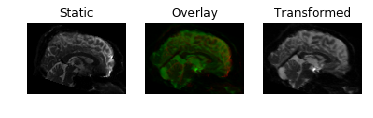

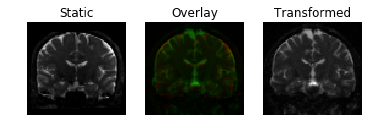

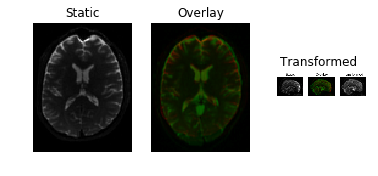

In [61]:

"""
.. figure:: transformed_rigid_0.png
   :align: center
.. figure:: transformed_rigid_1.png
   :align: center
.. figure:: transformed_rigid_2.png
   :align: center

   Registration result with a rigid transform, using Mutual Information.
"""

"""
Finally, lets refine with a full affine transform (translation, rotation, scale
and shear), it is safer to fit more degrees of freedom now, since we must be
very close to the optimal transform
"""

transform = AffineTransform3D()
params0 = None
starting_affine = rigid.affine
affine = affreg.optimize(static, moving, transform, params0,
                         static_grid2world, moving_grid2world,
                         starting_affine=starting_affine)

"""
This results in a slight shear and scale
"""

transformed = affine.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_affine_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_affine_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_affine_2.png")


##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_affine_0.png" #Image to be used as query
image_nameTwo = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_affine_1.png"
image_nameThree = "/Users/ptm/desktop/Current_working_directory/DIPY/transformed_affine_2.png"

def plotImage(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
plotImage(image_nameTwo)
plotImage(image_nameThree)
plt.show()
plt.clf()
##
##
##


In [62]:

"""
.. figure:: transformed_affine_0.png
   :align: center
.. figure:: transformed_affine_1.png
   :align: center
.. figure:: transformed_affine_2.png
   :align: center

   Registration result with an affine transform, using Mutual Information.

.. [Mattes03] Mattes, D., Haynor, D. R., Vesselle, H., Lewellen, T. K.,
              Eubank, W. (2003). PET-CT image registration in the chest using
              free-form deformations. IEEE Transactions on Medical Imaging,
              22(1), 120-8.
.. [Avants11] Avants, B. B., Tustison, N., & Song, G. (2011). Advanced
              Normalization Tools ( ANTS ), 1-35.

.. include:: ../links_names.inc

"""


'\n.. figure:: transformed_affine_0.png\n   :align: center\n.. figure:: transformed_affine_1.png\n   :align: center\n.. figure:: transformed_affine_2.png\n   :align: center\n\n   Registration result with an affine transform, using Mutual Information.\n\n.. [Mattes03] Mattes, D., Haynor, D. R., Vesselle, H., Lewellen, T. K.,\n              Eubank, W. (2003). PET-CT image registration in the chest using\n              free-form deformations. IEEE Transactions on Medical Imaging,\n              22(1), 120-8.\n.. [Avants11] Avants, B. B., Tustison, N., & Song, G. (2011). Advanced\n              Normalization Tools ( ANTS ), 1-35.\n\n.. include:: ../links_names.inc\n\n'

Data size is approximately 9.2MB
Download Progress: [##################################] 100.00%  of 9.19 MBFiles successfully downloaded to /Users/ptm/.dipy


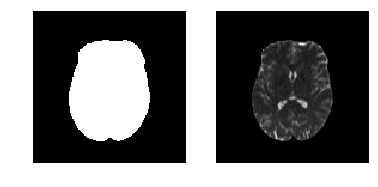

In [63]:


# https://github.com/nipy/dipy/blob/master/doc/examples/brain_extraction_dwi.py

"""
===================================
Brain segmentation with median_otsu
===================================

We show how to extract brain information and mask from a b0 image using dipy_'s
``segment.mask`` module.

First import the necessary modules:
"""

import numpy as np
import nibabel as nib

"""
Download and read the data for this tutorial.

The ``scil_b0`` dataset contains different data from different companies and
models. For this example, the data comes from a 1.5 Tesla Siemens MRI.
"""

from dipy.data.fetcher import fetch_scil_b0, read_siemens_scil_b0
fetch_scil_b0()
img = read_siemens_scil_b0()
data = np.squeeze(img.get_data())

"""
``img`` contains a nibabel Nifti1Image object. Data is the actual brain data as
a numpy ndarray.

Segment the brain using DIPY's ``mask`` module.

``median_otsu`` returns the segmented brain data and a binary mask of the brain.
It is possible to fine tune the parameters of ``median_otsu`` (``median_radius``
and ``num_pass``) if extraction yields incorrect results but the default
parameters work well on most volumes. For this example, we used 2 as
``median_radius`` and 1 as ``num_pass``
"""

from dipy.segment.mask import median_otsu
b0_mask, mask = median_otsu(data, 2, 1)

"""
Saving the segmentation results is very easy using nibabel. We need the
``b0_mask``, and the binary mask volumes. The affine matrix which transform the
image's coordinates to the world coordinates is also needed. Here, we choose to
save both images in ``float32``.
"""

mask_img = nib.Nifti1Image(mask.astype(np.float32), img.affine)
b0_img = nib.Nifti1Image(b0_mask.astype(np.float32), img.affine)

fname = 'se_1.5t'
nib.save(mask_img, fname + '_binary_mask.nii.gz')
nib.save(b0_img, fname + '_mask.nii.gz')



##
##
##
import nibabel as nib
newImage = '/Users/ptm/desktop/Current_working_directory/DIPY/se_1.5t_binary_mask.nii.gz'
newImageTwo = '/Users/ptm/desktop/Current_working_directory/DIPY/se_1.5t_mask.nii.gz'
img = nib.load(newImage)
data = img.get_data()
imgTwo = nib.load(newImageTwo)
dataTwo = imgTwo.get_data()
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
axial_middleTwo = dataTwo.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle].T, cmap='gray', origin='lower')
#plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(dataTwo[:, :, axial_middleTwo].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('tensor_fa.png', bbox_inches='tight')
plt.clf()
##
##
##


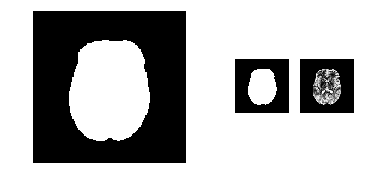

In [64]:


"""
Quick view of the results middle slice using ``matplotlib``.
"""

import matplotlib.pyplot as plt
from dipy.core.histeq import histeq

sli = data.shape[2] // 2
plt.figure('Brain segmentation')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(histeq(data[:, :, sli].astype('float')).T,
           cmap='gray', origin='lower')

plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(histeq(b0_mask[:, :, sli].astype('float')).T,
           cmap='gray', origin='lower')

plt.savefig('median_otsu.png')



##
##
##
import cv2 as cv2
# Plot Image
#%matplotlib inline
image_name = "/Users/ptm/desktop/Current_working_directory/DIPY/median_otsu.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)
plt.show()
plt.clf()
##
##
##


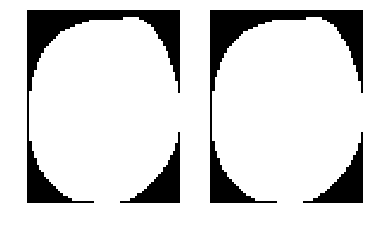

'\n\n.. include:: ../links_names.inc\n\n'

In [65]:

"""
.. figure:: median_otsu.png
   :align: center

   An application of median_otsu for brain segmentation.

``median_otsu`` can also automatically crop the outputs to remove the largest
possible number of background voxels. This makes outputted data significantly
smaller. Auto-cropping in ``median_otsu`` is activated by setting the
``autocrop`` parameter to ``True``.
"""

b0_mask_crop, mask_crop = median_otsu(data, 4, 4, autocrop=True)

"""
Saving cropped data using nibabel as demonstrated previously.
"""

mask_img_crop = nib.Nifti1Image(mask_crop.astype(np.float32), img.affine)
b0_img_crop = nib.Nifti1Image(
    b0_mask_crop.astype(np.float32), img.affine)
nib.save(mask_img_crop, fname + '_binary_mask_crop.nii.gz')
nib.save(b0_img_crop, fname + '_mask_crop.nii.gz')


##
##
##
import nibabel as nib
newImage = '/Users/ptm/desktop/Current_working_directory/DIPY/se_1.5t_binary_mask_crop.nii.gz'
newImageTwo = '/Users/ptm/desktop/Current_working_directory/DIPY/se_1.5t_mask_crop.nii.gz'
img = nib.load(newImage)
data = img.get_data()
imgTwo = nib.load(newImageTwo)
dataTwo = imgTwo.get_data()
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
axial_middleTwo = dataTwo.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle].T, cmap='gray', origin='lower')
#plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(dataTwo[:, :, axial_middleTwo].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('tensor_fa.png', bbox_inches='tight')
plt.clf()
##
##
##



"""

.. include:: ../links_names.inc

"""




In [66]:
# For Advanced Tracking and Advanced Visualization, open the following file in Anaconda/Spyder:
# https://github.com/paultimothymooney/Programming-Projects/tree/master/Python/Image%20Analysis/DIPY